<a href="https://colab.research.google.com/github/vitorwogel/MVP-Data-Analytics/blob/main/MVP_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Vitor André B. Wogel Costa

**Dataset:** [English Premier League - Player Stats - 24/25](https://www.kaggle.com/datasets/aesika/english-premier-league-player-stats-2425)



# Descrição do Problema

No futebol, além do talento dos jogadores, existem áreas de estudo sobre o jogo, como a análise de dados, que buscam responder questões relevantes para que as equipes se apoiem nos resultados obtidos para tomadas de decisão.

Este trabalho, baseado no dataset [English Premier League - Player Stats - 24/25](https://www.kaggle.com/datasets/aesika/english-premier-league-player-stats-2425), disponibilizado no Kaggle, tem como objetivo analisar e descrever as características mais relevantes a um atleta de futebol que o levam a marcar mais gols.

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- Existe um conjunto de características comuns aos maiores artilheiros?

- É possível agrupar jogadores com características comuns e definir aqueles com maior tendência de marcar gol?

## Tipo de Problema

Este é um problema de **aprendizado não supervisionado**, onde se busca compreender padrões entre os diferentes jogadores e agrupá-los de forma a entender quais são aqueles mais propensos a marcar gols.

## Seleção de Dados

O dataset escolhido é composto por 562 jogadores de todos os times da principal divisão da liga inglesa de futebol. Além disso, 57 colunas definem o conjunto global de características individuais de cada jogador, sendo grande parte numérica.

Com isso, é esperado que hajam exemplos e variáveis suficientes para fazer uma boa análise exploratória e conseguir responder de forma assertiva as perguntas elencadas na definição e hipóteses do problema.

## Atributos do Dataset



O dataset completo possui 57 colunas, mas nem todas serão utilizadas. Ao final do trabalho foram selecionadas as mais relevantes de serem compreendidas e então printadas no formato de tabela conforme desenha o código abaixo:

In [1]:
import pandas as pd

ordered_features = [
    'Shots',
    'Big Chances Missed',
    'Offsides',
    'Dispossessed',
    'Hit Woodwork',
    'Assists',
    'Appearances',
    'Minutes',
    'Through Balls',
    'Possession Won',
    'Passes%',
    'fThird Passes %',
    'Carries',
    'Progressive Carries',
    'Carries Ended with Shot',
    'Carries Ended with Chance',
    'Crosses %',
    'Carries Ended with Assist',
    'Touches'
]

translations = {
    'Shots': 'Chutes',
    'Big Chances Missed': 'Grandes Chances Perdidas',
    'Offsides': 'Impedimentos',
    'Dispossessed': 'Perdas de Posse',
    'Hit Woodwork': 'Bolas na Trave',
    'Assists': 'Assistências',
    'Appearances': 'Partidas',
    'Minutes': 'Minutos em Campo',
    'Through Balls': 'Enfiadas de Bola',
    'Possession Won': 'Posse Recuperada',
    'Passes%': 'Precisão de Passes (%)',
    'fThird Passes %': 'Precisão no Terço Final (%)',
    'Carries': 'Conduções',
    'Progressive Carries': 'Conduções Progressivas',
    'Carries Ended with Shot': 'Conduções Finalizadas com Chute',
    'Carries Ended with Chance': 'Conduções Finalizadas com Chance',
    'Crosses %': 'Precisão de Cruzamentos (%)',
    'Carries Ended with Assist': 'Conduções Finalizadas com Assistência',
    'Touches': 'Toques na Bola'
}

categorical_features = ['Player Name', 'Club', 'Nationality', 'Position']
categorical_translations = ['Nome do Jogador', 'Clube', 'Nacionalidade', 'Posição']
categorical_types = ['string'] * len(categorical_features)

cat_df = pd.DataFrame({
    'Nome da Coluna': categorical_features,
    'Tradução': categorical_translations,
    'Tipo de Dado': categorical_types
})

float_vars = ['Passes%', 'fThird Passes %', 'Crosses %']
types_corrected = ['float' if col in float_vars else 'int' for col in ordered_features]

attributes_df = pd.DataFrame({
    'Nome da Coluna': ordered_features,
    'Tradução': [translations[col] for col in ordered_features],
    'Tipo de Dado': types_corrected
})

final_df = pd.concat([cat_df, attributes_df], ignore_index=True)
final_df

,Nome da Coluna,Tradução,Tipo de Dado
0,Player Name,Nome do Jogador,string
1,Club,Clube,string
2,Nationality,Nacionalidade,string
3,Position,Posição,string
4,Shots,Chutes,int
5,Big Chances Missed,Grandes Chances Perdidas,int
6,Offsides,Impedimentos,int
7,Dispossessed,Perdas de Posse,int
8,Hit Woodwork,Bolas na Trave,int
9,Assists,Assistências,int


# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Iris.

In [2]:
# A biblioteca pandas já foi importada na etapa anterior
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

In [3]:
# carregamento do dataset
url = "https://raw.githubusercontent.com/vitorwogel/MVP-Data-Analytics/main/epl_player_stats_24_25.csv"
df = pd.read_csv(url)

In [4]:
# primeiras linhas
df.head()

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,...,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
0,Ben White,Arsenal,England,DEF,17,1198,0,2,9,12,...,10,2,0,0,0%,0,0,0,0,0.0
1,Bukayo Saka,Arsenal,England,MID,25,1735,6,10,67,2,...,15,3,0,0,0%,0,0,0,0,0.0
2,David Raya,Arsenal,Spain,GKP,38,3420,0,0,0,0,...,1,3,0,86,72%,0,0,8,53,2.1
3,Declan Rice,Arsenal,England,MID,35,2833,4,7,48,18,...,21,5,1,0,0%,0,0,0,0,0.0
4,Ethan Nwaneri,Arsenal,England,MID,26,889,4,0,24,0,...,9,1,0,0,0%,0,0,0,0,0.0


# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset selecionado, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

O dataset escolhido possui 562 instâncias (observações), com diversas características diferentes, das quais nem todas serão utilizadas por não representarem de forma objetiva correlação com a variável principal (*Goals*).

Quatro variáveis que identificam os jogadores individualmente são categóricas (*Player name*, *Club*, *Nationality* e *Position*), além dessas, existem outras variáveis referentes a porcertagem que estão classificadas como categóricas, no entando será avaliada a possibilidade de estas serem discretizadas.

In [5]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 562

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Player Name                562 non-null    object 
 1   Club                       562 non-null    object 
 2   Nationality                562 non-null    object 
 3   Position                   562 non-null    object 
 4   Appearances                562 non-null    int64  
 5   Minutes                    562 non-null    int64  
 6   Goals                      562 non-null    int64  
 7   Assists                    562 non-null    int64  
 8   Shots                      562 non-null    int64  
 9   Shots On Target            562 non-null    int64  
 10  Conversion %               562 non-null    object 
 11  Big Chances Missed         562 non-null    int64  
 12  Hit Woodwork               562 non-null    int64  
 1

Visto que o objetivo do trabalho é separar grupos de jogadores mais propensos a marcar gols, podemos eliminar de imediato colunas que não possuem nenhuma correlação com funções ofensivas dentro de campo, sendo elas exclusivamente defensivas ou função de goleiro.

In [6]:
to_drop = [
    "Clean Sheets",
    "Clearances",
    "Interceptions",
    "Blocks",
    "Tackles",
    "Ground Duels",
    "gDuels Won",
    "gDuels %",
    "Aerial Duels",
    "aDuels Won",
    "aDuels %",
    "Goals Conceded",
    "xGoT Conceded",
    "Own Goals",
    "Fouls",
    "Yellow Cards",
    "Red Cards",
    "Saves",
    "Saves %",
    "Penalties Saved",
    "Clearances Off Line",
    "Punches",
    "High Claims",
    "Goals Prevented"
]

df = df.drop(to_drop, axis=1)

Baseando-se no contexto de partidas de futebol, goleiros raramente são responsáveis por marcar gols, podendo assim gols feitos por goleiros serem considerados como *outliers* nesta análise.

Portanto, excluiremos todas as linhas em que o jogador pertence a esta posição.

In [7]:
df["Position"].unique()

array(['DEF', 'MID', 'GKP', 'FWD'], dtype=object)

In [8]:
df = df[df["Position"] != "GKP"]

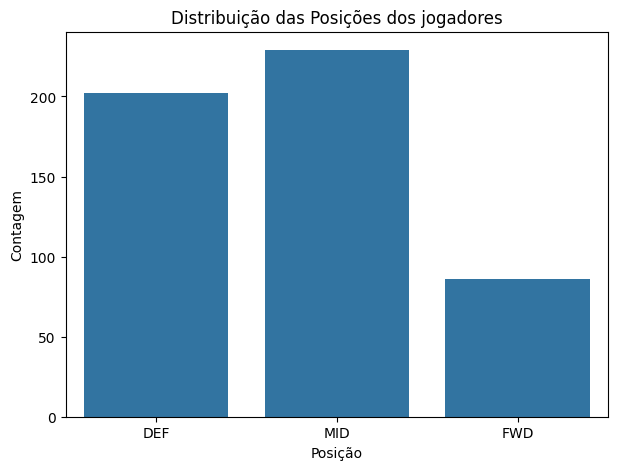

In [9]:
plt.figure(figsize=(7, 5))
# gráfico de barras simples
sns.countplot(x='Position', data=df)
plt.title('Distribuição das Posições dos jogadores')
plt.xlabel('Posição')
plt.ylabel('Contagem')
plt.show()

O gráfico ilustrado mostra que as classes de posição dos jogadores estão um tanto desbalanceadas, sendo a maior parte do dataset composto por defensores ou meio-campistas.

Esta composição pode interferir negativamente na análise, visto que o objetivo é agrupar jogadores com maior potencial de marcar gols, e esta é uma função geralmente atribuída à atacantes.

Para tentar balancear um pouco mais o dataset e focar no objetivo da análise serão excluídos todos os jogadores que não possuem gols marcados e então será análisada novamente a distribuição por posição.

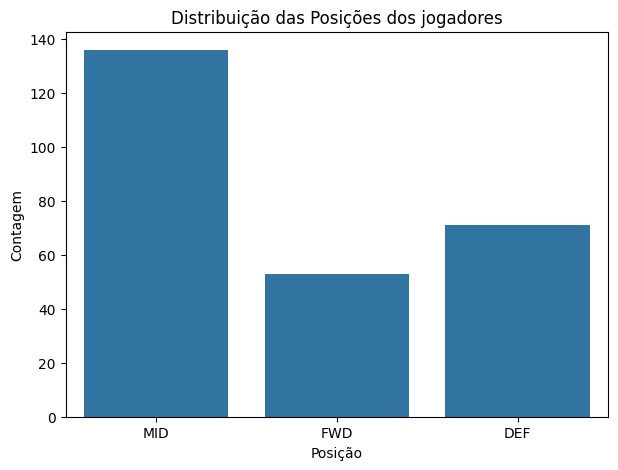

In [10]:
df = df[df["Goals"] > 0]

plt.figure(figsize=(7, 5))
# gráfico de barras simples
sns.countplot(x='Position', data=df)
plt.title('Distribuição das Posições dos jogadores')
plt.xlabel('Posição')
plt.ylabel('Contagem')
plt.show()

A pesar de ainda um pouco desbalanceada, a análise agora está mais voltada para jogadores que já marcaram pelo menos 1 gol, o que se aproxima mais do objetivo proposto.

Contando com o fato de que grande parte dos jogadores é considerado meio-campista, pois existem várias subdivisões na posição, como por exemplo: volante, meia-central, meia-atacante, etc. Não é um problema grande a concentração de instâncias nessa classe.

In [11]:
df["Player Name"].count()

np.int64(260)

Com as restrições realizadas sobraram 260 registros no dataset, entretanto, se tratam de dados com maior qualidade.

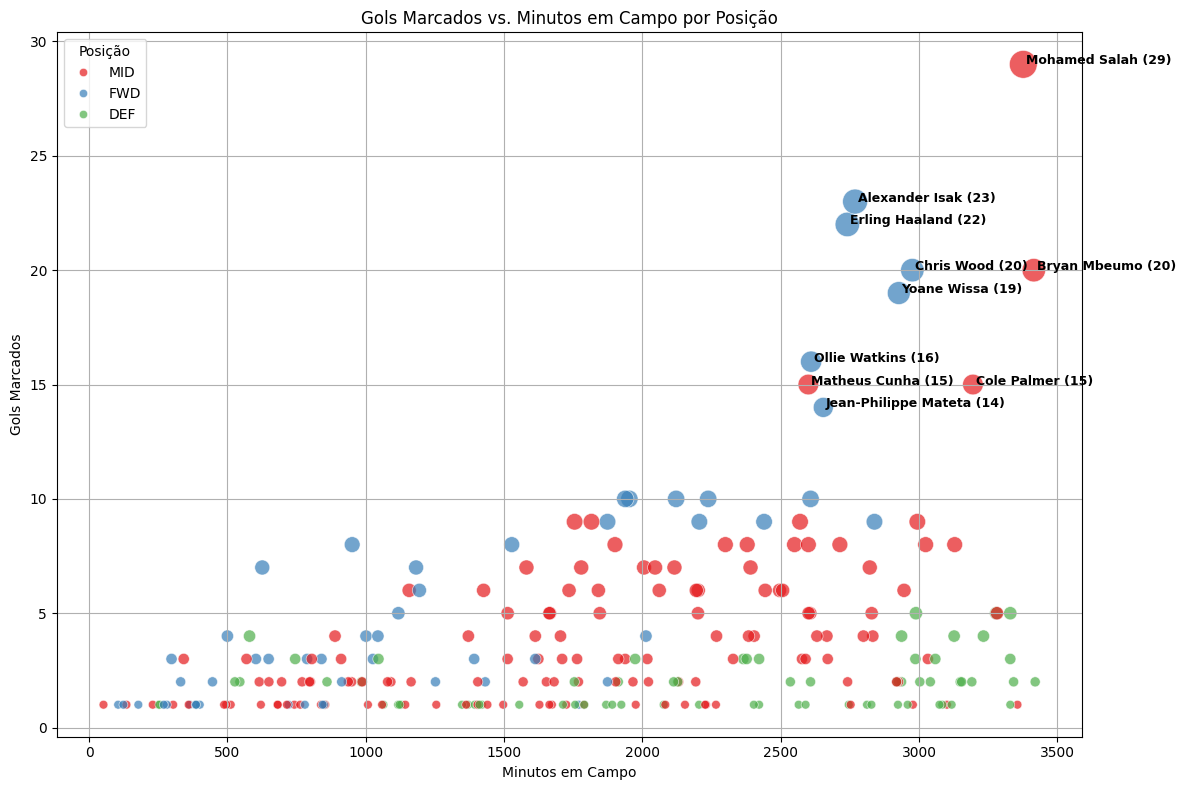

In [12]:
top10 = df.nlargest(10, "Goals")

plt.figure(figsize=(12, 8))

scatter = sns.scatterplot(
    data=df,
    x="Minutes",
    y="Goals",
    hue="Position",
    size="Goals",
    sizes=(40, 400),
    palette="Set1",
    alpha=0.7,
    legend="full"
)

handles, labels = scatter.get_legend_handles_labels()

position_labels = df["Position"].unique().tolist()
position_handles_labels = [
    (h, l) for h, l in zip(handles, labels) if l in position_labels
]

if position_handles_labels:
    handles, labels = zip(*position_handles_labels)
    scatter.legend(
        handles=handles,
        labels=labels,
        title="Posição",
        loc="upper left",
        frameon=True
    )

for _, row in top10.iterrows():
    plt.text(
        row["Minutes"] + 10,
        row["Goals"],
        f"{row['Player Name']} ({row['Goals']})",
        fontsize=9,
        weight='bold'
    )

plt.title("Gols Marcados vs. Minutos em Campo por Posição")
plt.xlabel("Minutos em Campo")
plt.ylabel("Gols Marcados")
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
goals_top10 = 0
for _, row in top10.iterrows():
  print(f"{row['Player Name']} ({row['Goals']})")
  goals_top10 += row['Goals']

Mohamed Salah (29)
Alexander Isak (23)
Erling Haaland (22)
Bryan Mbeumo (20)
Chris Wood (20)
Yoane Wissa (19)
Ollie Watkins (16)
Cole Palmer (15)
Matheus Cunha (15)
Jean-Philippe Mateta (14)


A partir do gráfico acima, é possível analisar que até a faixa de 10 gols marcados a influência de minutagem jogada não é tão assintosa quanto quando passamos dessa margem, não existindo instâncias com mais de 10 gols e menos de 2500 minutos jogados na temporada.

Além disso, é notável que há um grupo de 10 jogadores que mais se destacam no quesito marcar gols, pelo gráfico observamos que eles são *outliers* em relação aos demais.

Todavia esses jogadores não atrapalharão a análise, pelo contrário, observar suas características em comum pode dar um entendimento maior sobre o problema elencado neste trabalho.

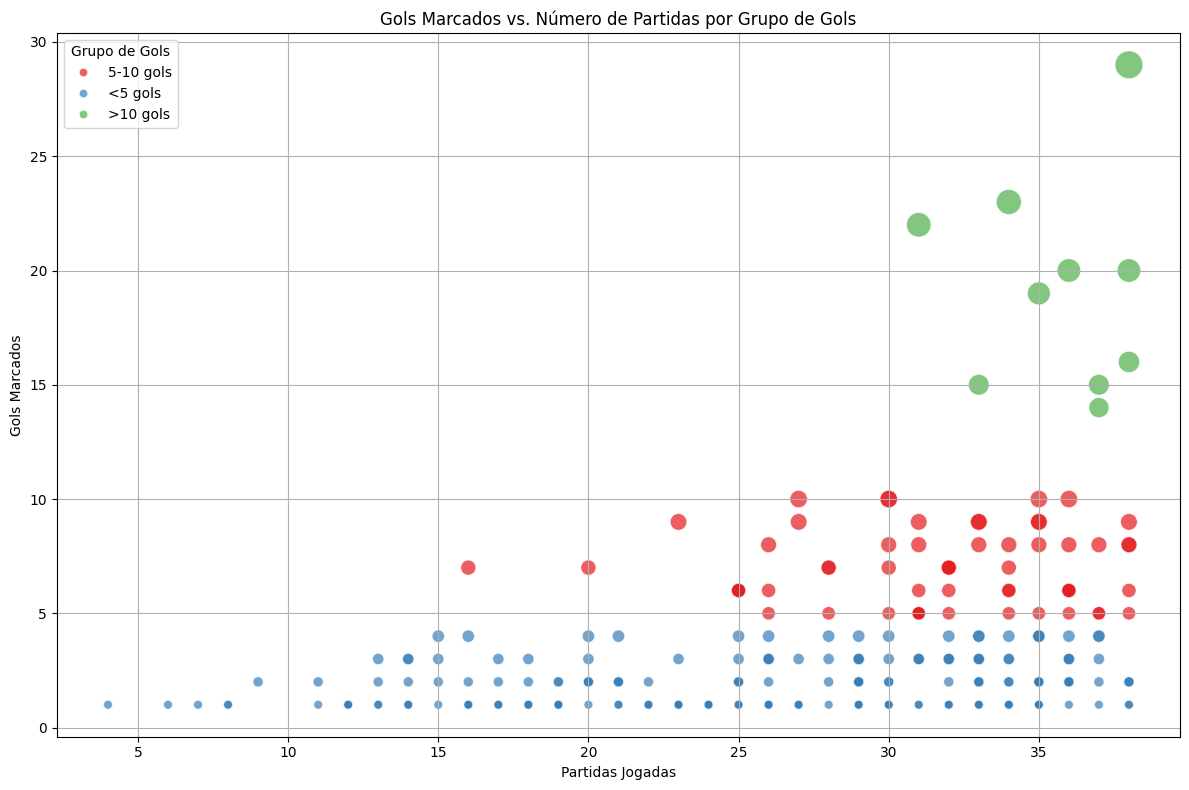

In [14]:
def categorize_goals(goals):
    if goals < 5:
        return "<5 gols"
    elif goals <= 10:
        return "5-10 gols"
    else:
        return ">10 gols"

df["Goals Group"] = df["Goals"].apply(categorize_goals)

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=df,
    x="Appearances",
    y="Goals",
    hue="Goals Group",
    size="Goals",
    sizes=(40, 400),
    palette="Set1",
    alpha=0.7,
    legend="full"
)

handles, labels = scatter.get_legend_handles_labels()
goal_groups = ["<5 gols", "5-10 gols", ">10 gols"]
filtered = [(h, l) for h, l in zip(handles, labels) if l in goal_groups]

if filtered:
    handles, labels = zip(*filtered)
    plt.legend(
        handles=handles,
        labels=labels,
        title="Grupo de Gols",
        loc="upper left",
        frameon=True
    )

plt.title("Gols Marcados vs. Número de Partidas por Grupo de Gols")
plt.xlabel("Partidas Jogadas")
plt.ylabel("Gols Marcados")
plt.grid(True)
plt.tight_layout()
plt.show()

O gráfico acima é bem parecido com o anterior, com a diferença que o eixo X representa o número de partidas jogados e não a minutagem em campo.

A partir dele fica claro que existem 3 grupos distintos de jogadores a serem analisados:
1. Aqueles que possuem menos de 5 gols marcados;
2. Aqueles que possuem de 5 à 10 gols na competição;
3. Aqueles que possuem mais de 10 gols.

Surgiu uma dúvida em relação às variáveis percentuais, mais especificamente relacionada à "Conversion %" (ou conversão de chutes).

Seria esta variável proporcional ao número de chutes que terminaram em gol ou ao número de chutes totais em relação aos que foram na direção do gol (também contam aqueles que o goleiro pegou)?

Como não foi possível encontrar essa informação da documentação do dataset do [Kaggle](https://www.kaggle.com/datasets/aesika/english-premier-league-player-stats-2425), essa checagem será feita no trecho de código a seguir:

In [15]:
df["Conversion %"] = df["Conversion %"].str.replace("%", "").astype(float)

df_top5 = df.sort_values("Goals", ascending=False).head(5)

for _, row in df_top5.iterrows():
    shots = row["Shots"]
    shots_on_target = row["Shots On Target"]
    goals = row["Goals"]
    conversion = row["Conversion %"]
    jogador = row.get("Player Name", "Desconhecido")

    conv_gols = (goals / shots) * 100 if shots > 0 else 0
    conv_precisao = (shots_on_target / shots) * 100 if shots > 0 else 0

    print(f"\nJogador: {jogador}")
    print(f"Chutes: {shots}")
    print(f"Chutes no gol: {shots_on_target}")
    print(f"Gols: {goals}")
    print(f"Conversion % (no dataset): {conversion}%")
    print(f"-> (Gols / Chutes) * 100 = {conv_gols:.2f}%")
    print(f"-> (Chutes no gol / Chutes) * 100 = {conv_precisao:.2f}%")

    diff_gols = abs(conv_gols - conversion)
    diff_precisao = abs(conv_precisao - conversion)

    if diff_gols < diff_precisao:
        print("=> Conversion % parece estar baseada em GOLS / CHUTES")
    else:
        print("=> Conversion % parece estar baseada em CHUTES NO GOL / CHUTES")



Jogador: Mohamed Salah
Chutes: 130
Chutes no gol: 22
Gols: 29
Conversion % (no dataset): 7.0%
-> (Gols / Chutes) * 100 = 22.31%
-> (Chutes no gol / Chutes) * 100 = 16.92%
=> Conversion % parece estar baseada em CHUTES NO GOL / CHUTES

Jogador: Alexander Isak
Chutes: 99
Chutes no gol: 14
Gols: 23
Conversion % (no dataset): 13.0%
-> (Gols / Chutes) * 100 = 23.23%
-> (Chutes no gol / Chutes) * 100 = 14.14%
=> Conversion % parece estar baseada em CHUTES NO GOL / CHUTES

Jogador: Erling Haaland
Chutes: 108
Chutes no gol: 6
Gols: 22
Conversion % (no dataset): 20.0%
-> (Gols / Chutes) * 100 = 20.37%
-> (Chutes no gol / Chutes) * 100 = 5.56%
=> Conversion % parece estar baseada em GOLS / CHUTES

Jogador: Chris Wood
Chutes: 68
Chutes no gol: 2
Gols: 20
Conversion % (no dataset): 7.0%
-> (Gols / Chutes) * 100 = 29.41%
-> (Chutes no gol / Chutes) * 100 = 2.94%
=> Conversion % parece estar baseada em CHUTES NO GOL / CHUTES

Jogador: Bryan Mbeumo
Chutes: 85
Chutes no gol: 23
Gols: 20
Conversion % 

As colunas Shots On Target e Conversion % foram descartadas da análise por apresentarem inconsistências lógicas nos dados, como casos em que o número de gols supera o número de chutes no gol, o que inviabiliza sua confiabilidade. O ideal seria buscar uma nova fonte de dados confiável, mas, devido ao tempo limitado, optei por seguir com cautela, concentrando a análise nas variáveis restantes e avaliando criteriosamente quais colunas são adequadas para investigar a relação com o número de gols.

In [16]:
df = df.drop(["Shots On Target", "Conversion %"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, 1 to 555
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Player Name                260 non-null    object
 1   Club                       260 non-null    object
 2   Nationality                260 non-null    object
 3   Position                   260 non-null    object
 4   Appearances                260 non-null    int64 
 5   Minutes                    260 non-null    int64 
 6   Goals                      260 non-null    int64 
 7   Assists                    260 non-null    int64 
 8   Shots                      260 non-null    int64 
 9   Big Chances Missed         260 non-null    int64 
 10  Hit Woodwork               260 non-null    int64 
 11  Offsides                   260 non-null    int64 
 12  Touches                    260 non-null    int64 
 13  Passes                     260 non-null    int64 
 14  Successful Pass

Será realizada uma verificação sobre as outras colunas referentes à proporções no dataset, a fim de descartar possíveis inconsistências ou agrupar dados em uma só coluna.

In [17]:
df["Passes%"] = df["Passes%"].str.replace("%", "").astype(float)
df["Crosses %"] = df["Crosses %"].str.replace("%", "").astype(float)
df["fThird Passes %"] = df["fThird Passes %"].str.replace("%", "").astype(float)

df_top5 = df.sort_values("Goals", ascending=False).head(5)

for _, row in df_top5.iterrows():
    nome = row.get("Player Name", "Desconhecido")

    passes = row["Passes"]
    passes_sucesso = row["Successful Passes"]
    passes_pct = row["Passes%"]
    passes_pct_calc = (passes_sucesso / passes) * 100 if passes > 0 else 0

    crosses = row["Crosses"]
    crosses_sucesso = row["Successful Crosses"]
    crosses_pct = row["Crosses %"]
    crosses_pct_calc = (crosses_sucesso / crosses) * 100 if crosses > 0 else 0

    fthird = row["fThird Passes"]
    fthird_sucesso = row["Successful fThird Passes"]
    fthird_pct = row["fThird Passes %"]
    fthird_pct_calc = (fthird_sucesso / fthird) * 100 if fthird > 0 else 0

    print(f"\nJogador: {nome}")

    print(f"Passes: {passes}, Certos: {passes_sucesso}, % no dataset: {passes_pct}%")
    print(f"-> Cálculo real: {passes_pct_calc:.2f}%")

    print(f"Cruzamentos: {crosses}, Certos: {crosses_sucesso}, % no dataset: {crosses_pct}%")
    print(f"-> Cálculo real: {crosses_pct_calc:.2f}%")

    print(f"Passes no terço final: {fthird}, Certos: {fthird_sucesso}, % no dataset: {fthird_pct}%")
    print(f"-> Cálculo real: {fthird_pct_calc:.2f}%")



Jogador: Mohamed Salah
Passes: 769, Certos: 691, % no dataset: 90.0%
-> Cálculo real: 89.86%
Cruzamentos: 81, Certos: 21, % no dataset: 26.0%
-> Cálculo real: 25.93%
Passes no terço final: 274, Certos: 232, % no dataset: 85.0%
-> Cálculo real: 84.67%

Jogador: Alexander Isak
Passes: 1424, Certos: 1242, % no dataset: 87.0%
-> Cálculo real: 87.22%
Cruzamentos: 20, Certos: 2, % no dataset: 10.0%
-> Cálculo real: 10.00%
Passes no terço final: 517, Certos: 435, % no dataset: 84.0%
-> Cálculo real: 84.14%

Jogador: Erling Haaland
Passes: 1032, Certos: 904, % no dataset: 88.0%
-> Cálculo real: 87.60%
Cruzamentos: 9, Certos: 1, % no dataset: 11.0%
-> Cálculo real: 11.11%
Passes no terço final: 119, Certos: 78, % no dataset: 66.0%
-> Cálculo real: 65.55%

Jogador: Chris Wood
Passes: 657, Certos: 562, % no dataset: 86.0%
-> Cálculo real: 85.54%
Cruzamentos: 26, Certos: 8, % no dataset: 31.0%
-> Cálculo real: 30.77%
Passes no terço final: 239, Certos: 189, % no dataset: 79.0%
-> Cálculo real: 79

As colunas que representam percentuais de acerto em passes, cruzamentos e passes no terço final foram mantidas na análise por apresentarem consistência com os valores absolutos. Como essas métricas já refletem a eficiência do jogador, optei por utilizá-las em vez dos totais brutos, que podem ser influenciados por tempo de jogo ou volume de participação. Essa escolha também ajuda a evitar redundância e facilita comparações entre atletas com diferentes níveis de atividade.

In [18]:
df.drop(
    columns=[
        "Passes",
        "Successful Passes",
        "Crosses",
        "Successful Crosses",
        "fThird Passes",
        "Successful fThird Passes"
    ],
    inplace=True
)

# Também será descartada a coluna "Carries ended with goal", já que ela é
# diretamente dependente da variável alvo, o que pode comprometer
# a validade da análise.
df.drop(columns=["Carries Ended with Goal"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, 1 to 555
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Player Name                260 non-null    object 
 1   Club                       260 non-null    object 
 2   Nationality                260 non-null    object 
 3   Position                   260 non-null    object 
 4   Appearances                260 non-null    int64  
 5   Minutes                    260 non-null    int64  
 6   Goals                      260 non-null    int64  
 7   Assists                    260 non-null    int64  
 8   Shots                      260 non-null    int64  
 9   Big Chances Missed         260 non-null    int64  
 10  Hit Woodwork               260 non-null    int64  
 11  Offsides                   260 non-null    int64  
 12  Touches                    260 non-null    int64  
 13  Passes%                    260 non-null    float64
 14 

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [19]:
# estatísticas descritivas básicas do dataset
df.describe()

,Appearances,Minutes,Goals,Assists,Shots,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes%,Crosses %,fThird Passes %,Through Balls,Carries,Progressive Carries,Carries Ended with Assist,Carries Ended with Shot,Carries Ended with Chance,Possession Won,Dispossessed
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,27.453846,1788.830769,3.696154,1.942308,30.103846,3.811538,0.865385,3.796154,1152.142308,64.857692,16.519231,56.980769,3.238462,208.515385,109.369231,0.661538,5.369231,5.100000,72.869231,20.661538
std,8.003968,909.704069,4.047496,2.751016,23.268966,4.478074,1.202135,4.886431,707.829347,35.268837,17.506414,31.703312,4.761986,162.158306,90.571087,1.224296,8.096082,6.550487,54.787323,16.559267
min,4.000000,52.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.750000,997.500000,1.000000,0.000000,13.000000,1.000000,0.000000,1.000000,555.500000,67.500000,0.000000,52.000000,0.000000,80.750000,37.000000,0.000000,0.000000,0.000000,34.750000,8.000000
50%,29.000000,1789.500000,2.000000,1.000000,24.000000,2.000000,0.500000,2.000000,1089.000000,83.000000,17.000000,71.500000,2.000000,203.000000,100.000000,0.000000,2.000000,3.000000,70.000000,17.000000
75%,34.000000,2590.000000,5.000000,3.000000,40.250000,5.000000,1.000000,5.000000,1599.000000,87.000000,25.000000,79.000000,4.000000,323.750000,174.500000,1.000000,8.000000,7.000000,110.000000,29.250000
max,38.000000,3420.000000,29.000000,18.000000,130.000000,27.000000,6.000000,28.000000,3347.000000,94.000000,100.000000,91.000000,27.000000,770.000000,494.000000,9.000000,44.000000,35.000000,229.000000,93.000000


In [20]:
total_goals = df['Goals'].sum()
total_goals

np.int64(961)

In [21]:
df_scorers = df[(df["Goals"] < 5) & (df["Goals"] > 0)]
df_top_scorers = df[df["Goals"] >= 5]

print(f"Scorers: {df_scorers['Player Name'].count()}")
print(f"Top Scorers: {df_top_scorers['Player Name'].count()}")

print(f"Scorers goals: {df_scorers['Goals'].sum()}")
print(f"Top Scorers goals: {df_top_scorers['Goals'].sum()}")

print(f"Scorers goals %: {(df_scorers['Goals'].sum() / total_goals) * 100:.2f}%")
print(f"Top Scorers goals %: {(df_top_scorers['Goals'].sum() / total_goals) * 100:.2f}%")

Scorers: 193
Top Scorers: 67
Scorers goals: 366
Top Scorers goals: 595
Scorers goals %: 38.09%
Top Scorers goals %: 61.91%


Através do método *describe* do dataframe pandas, foi possível observar que 75% dos jogadores marcaram até 5 gols, o que gerou a curiosidade de analisar o quanto os maiores artilheiros da liga são responsáveis pelo número total de gols.

O mais interessante é que apenas 67 jogadores são responsáveis por marcar mais de 61% dos gols na temporada.

In [22]:
print(f"\nTotal de gols dos 10 artilheiros: {goals_top10}")

print(f"Gols dos 10 artilheiros %: {(goals_top10 / total_goals) * 100:.2f}%")


Total de gols dos 10 artilheiros: 193
Gols dos 10 artilheiros %: 20.08%


Voltando à discução sobre os 10 maiores artilheiros elencada anteriormente, esses jogadores são responsáveis por incríveis 20% de todos os gols marcados no ano.

### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [23]:
# média dos atributos numéricos do dataset
df.describe().loc['mean']

,mean
Appearances,27.453846
Minutes,1788.830769
Goals,3.696154
Assists,1.942308
Shots,30.103846
Big Chances Missed,3.811538
Hit Woodwork,0.865385
Offsides,3.796154
Touches,1152.142308
Passes%,64.857692


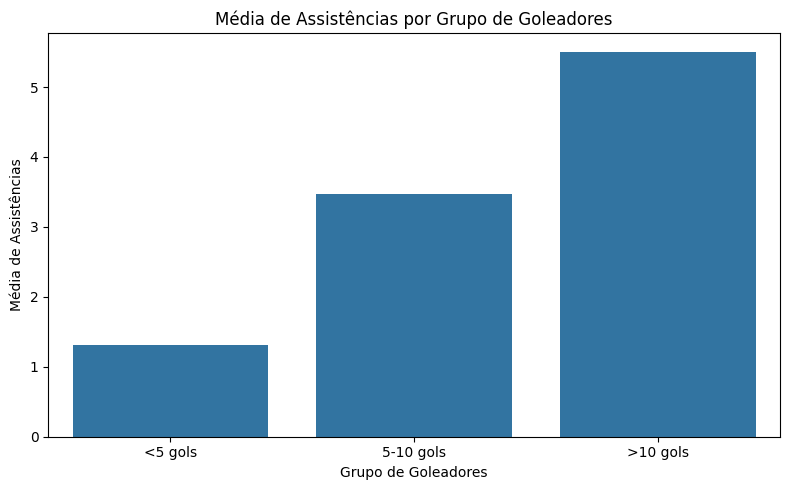

In [24]:
assist_avg = df.groupby('Goals Group')['Assists'].mean().reset_index()

order = ['<5 gols', '5-10 gols', '>10 gols']

plt.figure(figsize=(8, 5))
sns.barplot(data=assist_avg, x='Goals Group', y='Assists', order=order)
plt.title('Média de Assistências por Grupo de Goleadores')
plt.xlabel('Grupo de Goleadores')
plt.ylabel('Média de Assistências')
plt.tight_layout()
plt.show()

De acordo com o gráfico acima fica evidente que os jogadores com maior número de gols também contribuem mais nos gols do resto do time através de assistências (passes diretos para gol), isso pode mostrar uma correlação entre as variáveis *Goals* e *Assists*.

### Desvio padrão


In [25]:
std_df = df.describe().loc['std']
std_df

,std
Appearances,8.003968
Minutes,909.704069
Goals,4.047496
Assists,2.751016
Shots,23.268966
Big Chances Missed,4.478074
Hit Woodwork,1.202135
Offsides,4.886431
Touches,707.829347
Passes%,35.268837


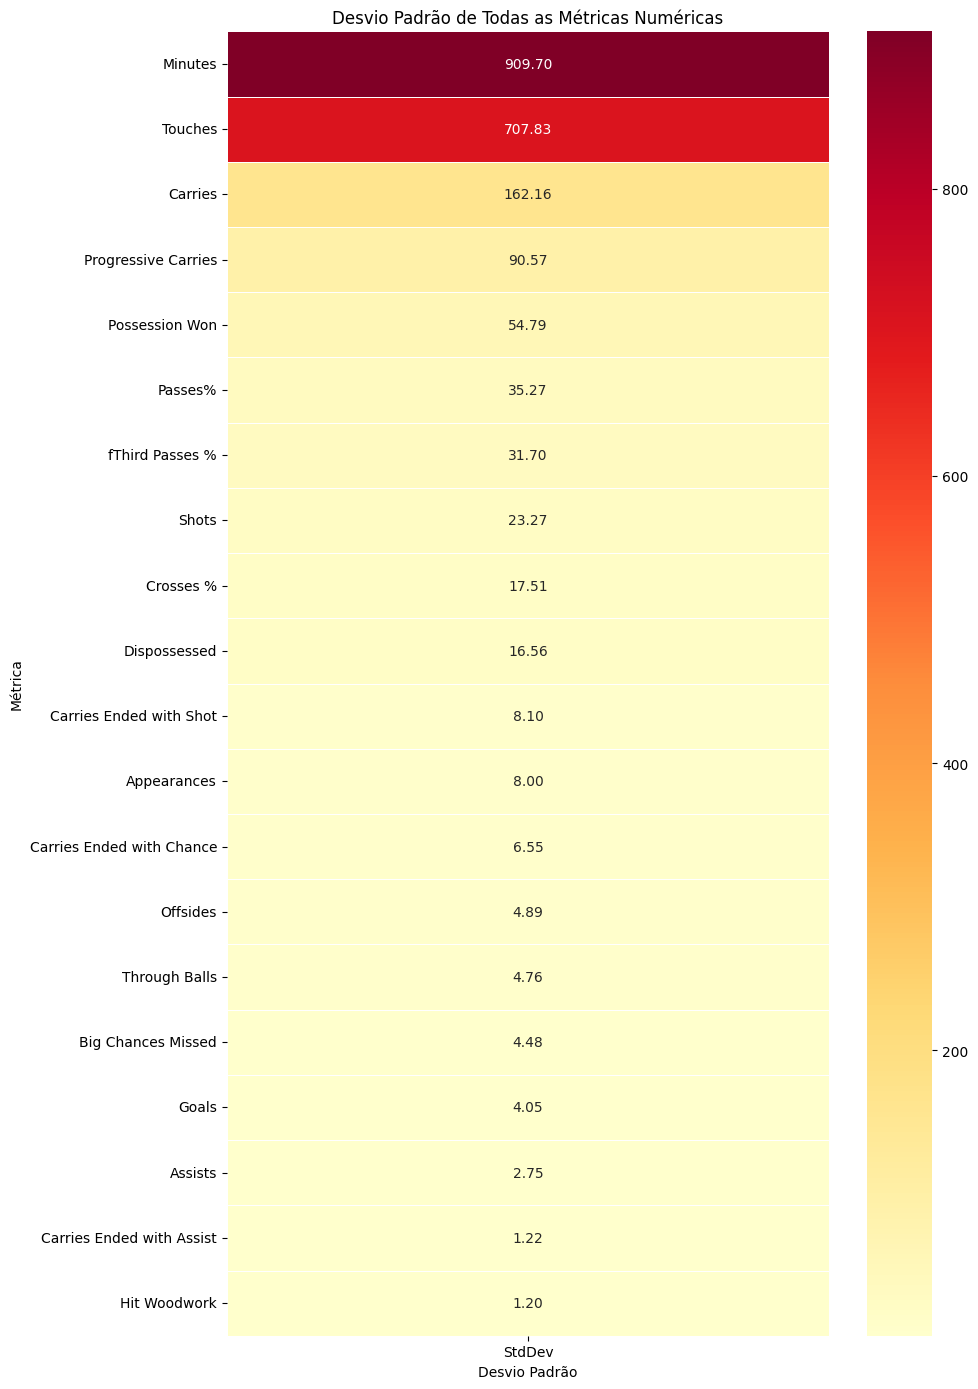

In [26]:
std_df = std_df.sort_values(ascending=False).to_frame(name='StdDev')

plt.figure(figsize=(10, 14))
sns.heatmap(std_df, annot=True, cmap="YlOrRd", fmt=".2f", linewidths=0.5)
plt.title('Desvio Padrão de Todas as Métricas Numéricas')
plt.xlabel('Desvio Padrão')
plt.ylabel('Métrica')
plt.tight_layout()
plt.show()

Através do gráfico acima, foi possível perceber que algumas métricas apresentam um desvio padrão muito elevado, como minutos jogados, toques na bola, passes e passes bem-sucedidos.

Esse alto grau de variabilidade em relação à média pode prejudicar a interpretação de padrões e impactar negativamente o desempenho de certos modelos estatísticos ou preditivos, especialmente se essas métricas não estiverem diretamente associadas a ações ofensivas relevantes.

Por esse motivo, optamos por focar nas métricas com menor desvio padrão, que tendem a ser mais estáveis e, potencialmente, mais correlacionadas ao número de gols marcados, o principal objetivo da análise.

## Histograma ##

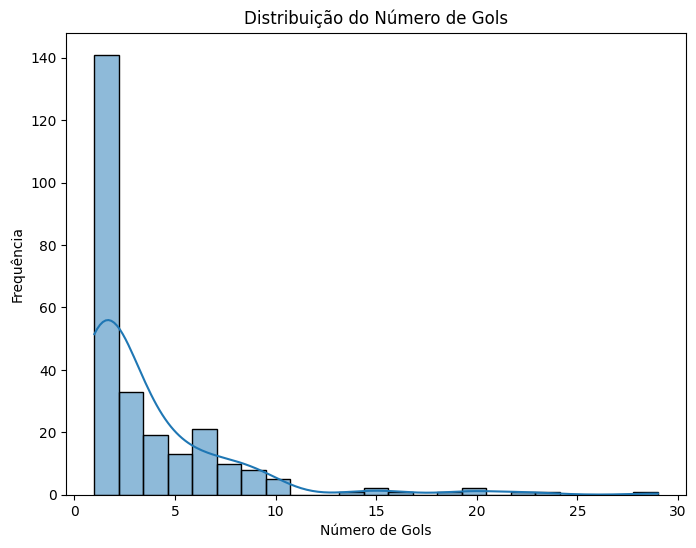

In [27]:
plt.figure(figsize=(8, 6))
# Histograma do numero de gols
sns.histplot(df['Goals'], kde=True)
plt.title('Distribuição do Número de Gols')
plt.xlabel('Número de Gols')
plt.ylabel('Frequência')
plt.show()

KDE: A curva de densidade mostra um pico acentuado no início (entre 0 e 2 gols), com uma queda brusca em direção à cauda direita.

Isso revela um tipo de distribuição assimétrica à direita (positivamente enviesada) e unimodal (um único pico dominante).

A maioria dos jogadores marcou pouquíssimos gols, e apenas uma minoria teve alta produtividade ofensiva. Isso reflete a estrutura natural de um campeonato, onde poucos atletas concentram a maior parte dos gols, como centroavantes e batedores de pênalti.

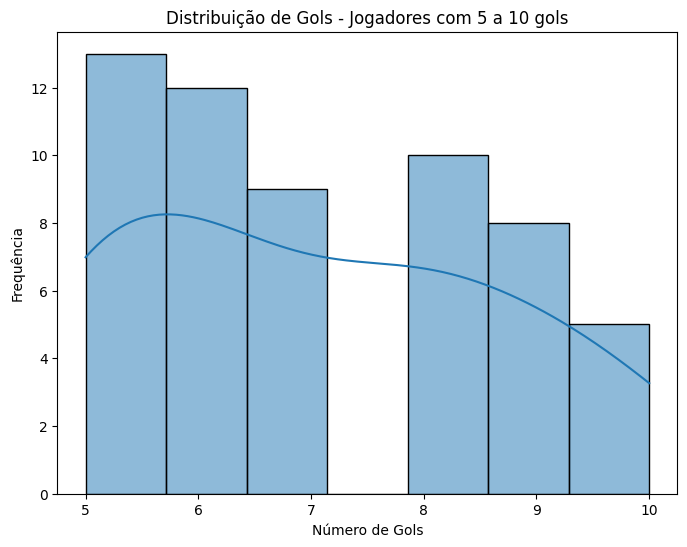

In [28]:
plt.figure(figsize=(8, 6))
sns.histplot(df[(df['Goals'] >= 5) & (df['Goals'] <= 10)]['Goals'], kde=True)
plt.title('Distribuição de Gols - Jogadores com 5 a 10 gols')
plt.xlabel('Número de Gols')
plt.ylabel('Frequência')
plt.show()

KDE: A curva exibe mais de um pico suave, indicando uma possível concentração em dois níveis distintos dentro do intervalo.

Isso revela um tipo de distribuição levemente multimodal ou bimodal suave

Entre os jogadores medianamente goleadores, há duas faixas mais comuns de desempenho. Isso pode refletir perfis diferentes: um grupo com desempenho consistente (8 a 10 gols) e outro com participação esporádica (5 a 6 gols).

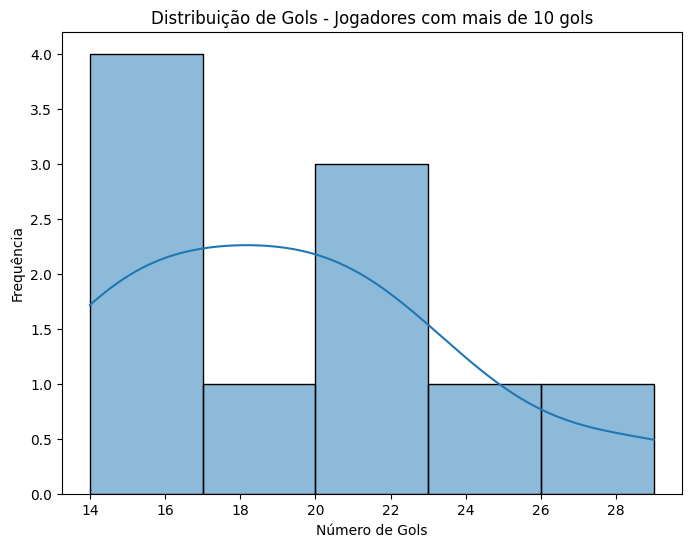

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(df[df['Goals'] > 10]['Goals'], kde=True)
plt.title('Distribuição de Gols - Jogadores com mais de 10 gols')
plt.xlabel('Número de Gols')
plt.ylabel('Frequência')
plt.show()

KDE: A curva apresenta dois picos visíveis — um entre 14–16 gols e outro próximo a 20–22.

Isso revela um tipo de distribuição bimodal clara

Entre os artilheiros, a distribuição mostra dois grupos: um primeiro de jogadores que marcaram "muitos" gols (14–16), e um segundo grupo de elite com desempenho ainda superior (20+ gols). Isso pode refletir a separação entre bons atacantes e os principais goleadores da liga.

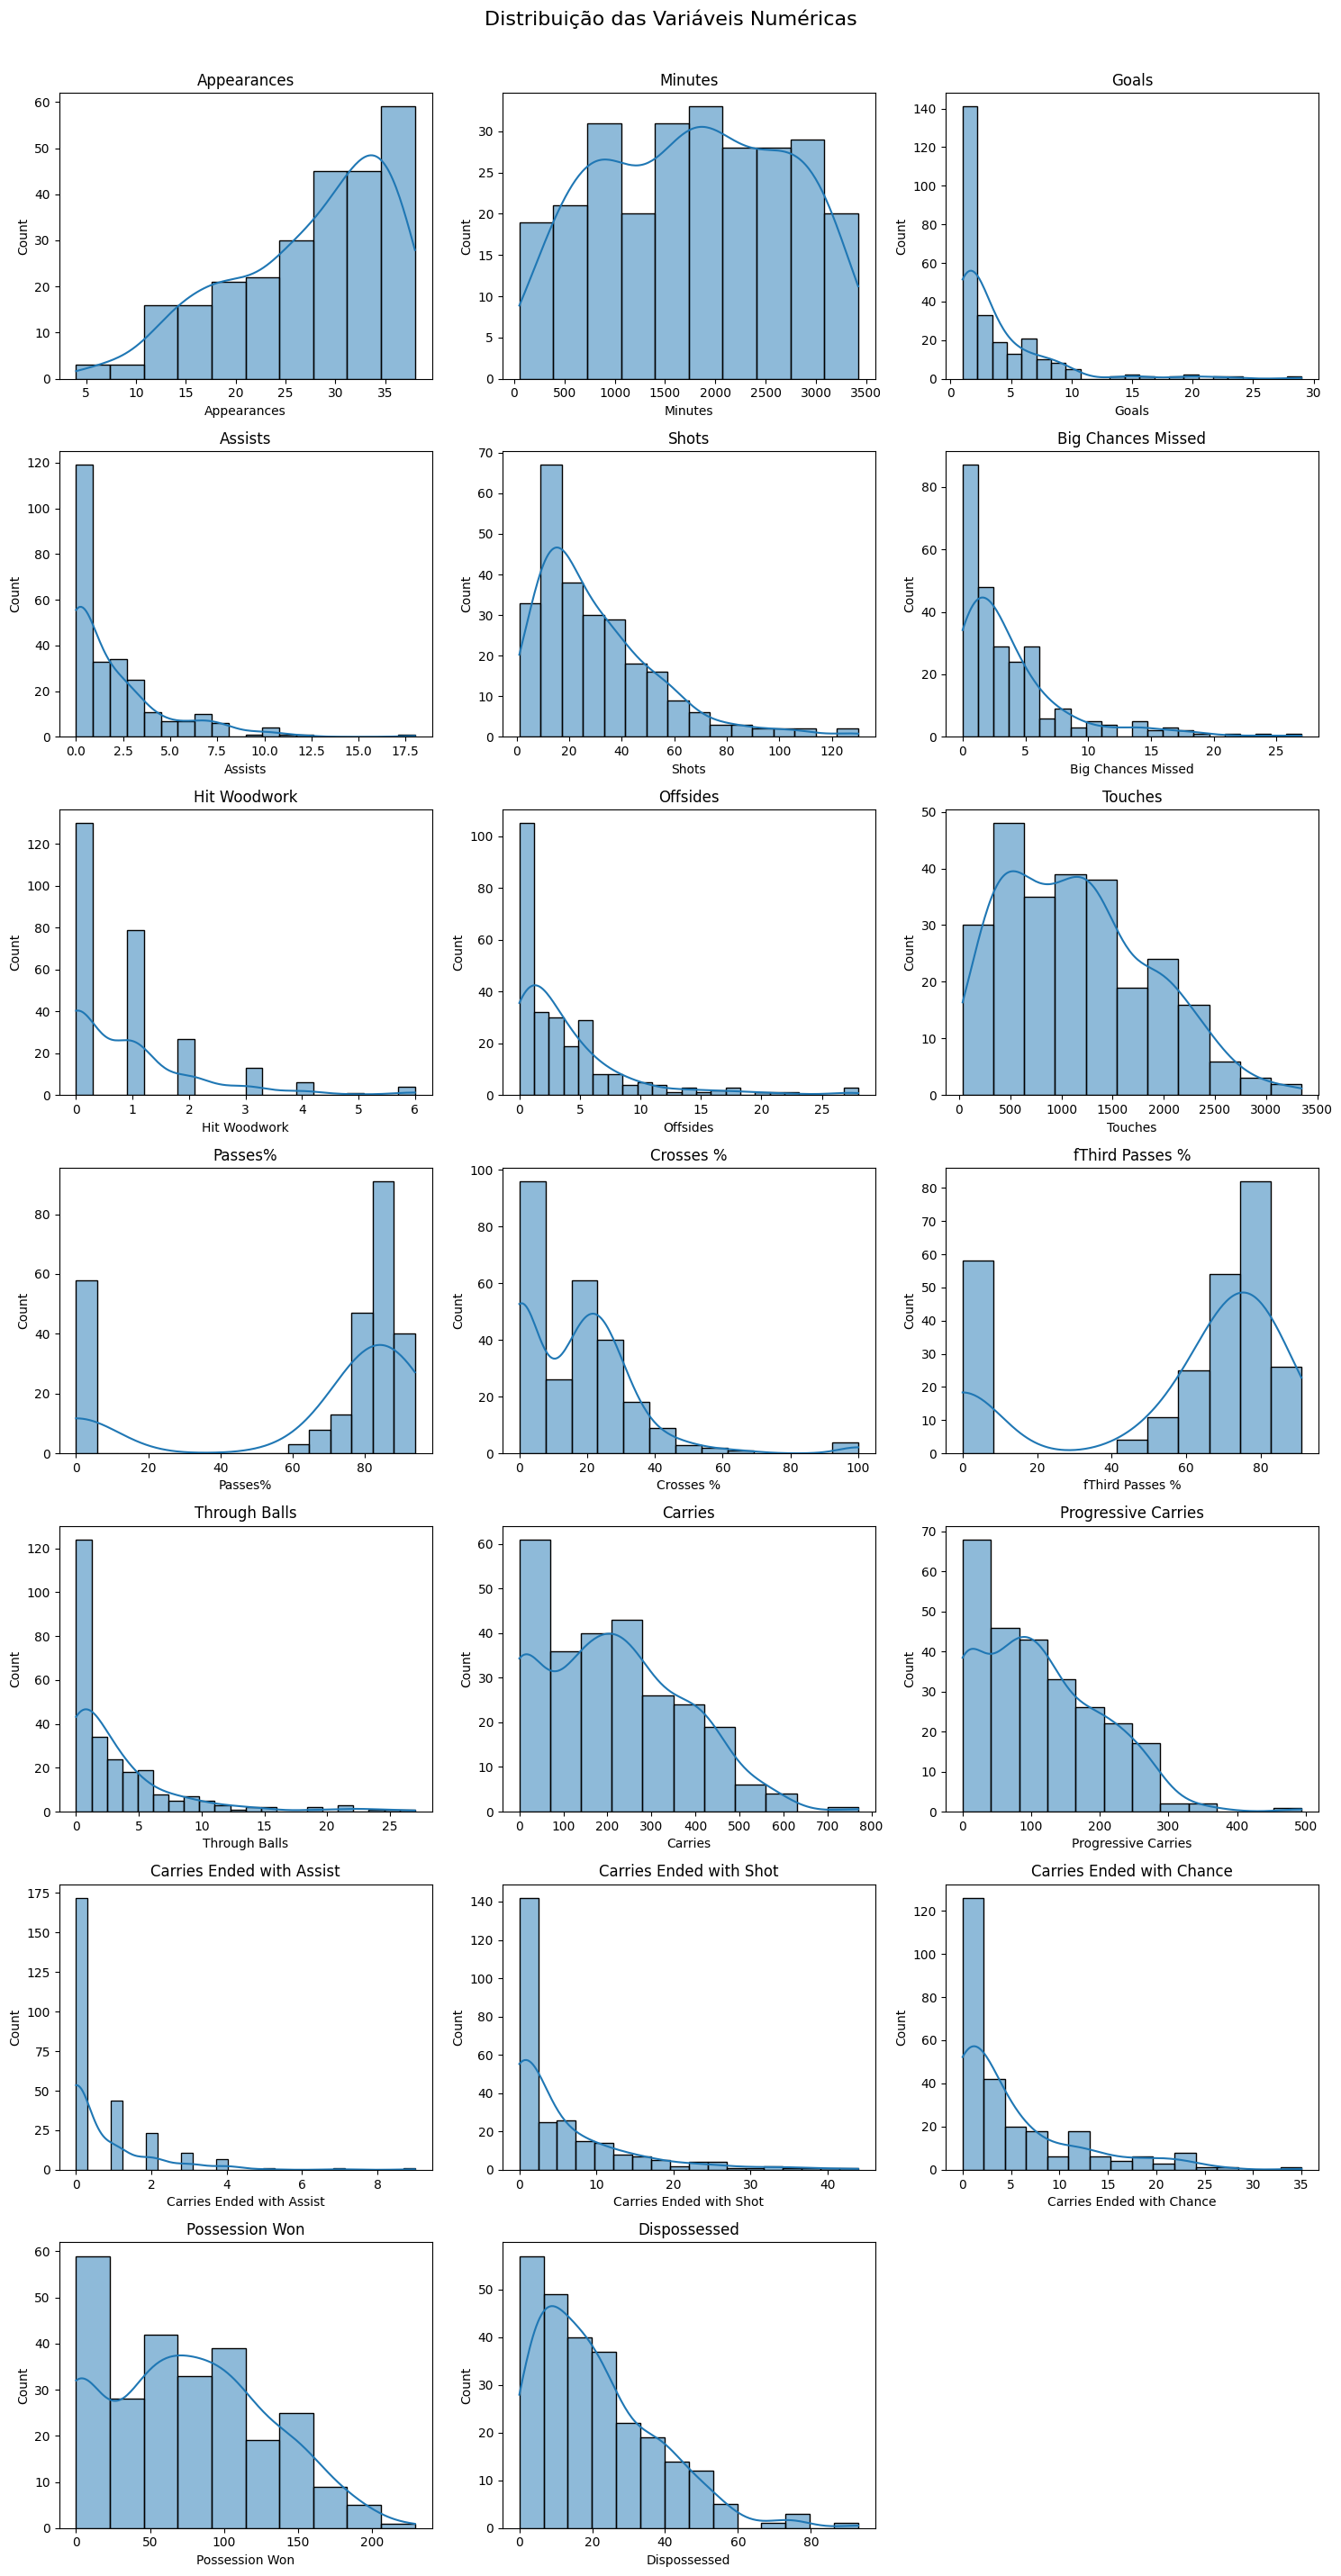

In [30]:
df_num = df.select_dtypes(include=['number'])

n_cols = 3
n_rows = (len(df_num.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for i, col in enumerate(df_num.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.suptitle('Distribuição das Variáveis Numéricas', fontsize=16, y=1.02)
plt.show()

A visualização das variáveis numéricas revela um forte padrão de assimetria à direita (distribuições enviesadas positivamente) na maioria dos atributos. Variáveis como Goals, Assists, Shots, Big Chances Missed, Hit Woodwork, Offsides, Through Balls, Carries Ended with Shot, Carries Ended with Assist e Carries Ended with Chance apresentam distribuição altamente concentrada em valores baixos, com poucos jogadores atingindo valores mais altos. Isso sugere que a maior parte dos atletas realiza poucas ações ofensivas de alto impacto, enquanto poucos concentram essas contribuições.

Algumas colunas como Minutes, Touches, Carries e Possession Won apresentam distribuição mais uniforme ou levemente bimodal, o que pode indicar diferenças claras entre jogadores titulares e reservas ou entre posições defensivas e ofensivas. Já variáveis como Passes%, Crosses % e fThird Passes % demonstram comportamentos variados: Passes% tem picos elevados em faixas altas (acima de 80%), enquanto Crosses % e fThird Passes % apresentam distribuições multimodais, o que pode indicar a existência de diferentes perfis técnicos no elenco analisado.

## Matriz de correlacao

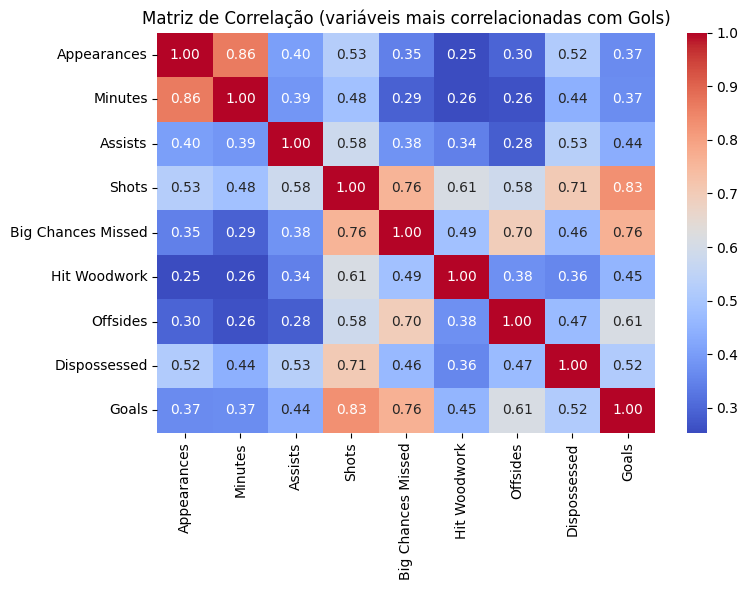

In [31]:
df_num = df.select_dtypes(include=['number'])

corr_matrix = df_num.corr()

target = 'Goals'

threshold = 0.3
correlacoes_fortes = corr_matrix[target][abs(corr_matrix[target]) > threshold].drop(target)

colunas_correlatas = correlacoes_fortes.index.tolist()
colunas_correlatas.append(target)

df_corr_reduzida = df_num[colunas_correlatas]

plt.figure(figsize=(8, 6))
sns.heatmap(df_corr_reduzida.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação (variáveis mais correlacionadas com Gols)')
plt.tight_layout()
plt.show()

A matriz de correlação mostra que as variáveis mais associadas ao número de gols são o número de chutes (0.83), grandes chances perdidas (0.76), e impedimentos (0.61). Outras variáveis como assistências, perdas de posse e minutos em campo também apresentam correlação moderada. Ademais, variáveis como cruzamentos, passes e toques na bola apresentaram correlação mais fraca com gols, indicando menor relevância direta para a diferenciação entre os grupos de jogadores.

## Boxplots ##

/tmp/ipython-input-32-4193408253.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Goals Group', y='Shots', palette='Blues', order=group_order)


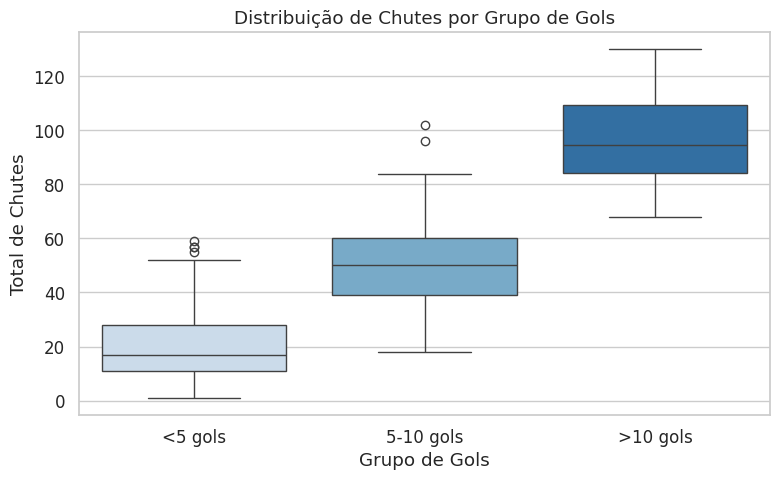

In [32]:
sns.set(style="whitegrid", font_scale=1.1)

group_order = ['<5 gols', '5-10 gols', '>10 gols']

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Goals Group', y='Shots', palette='Blues', order=group_order)
plt.title('Distribuição de Chutes por Grupo de Gols')
plt.xlabel('Grupo de Gols')
plt.ylabel('Total de Chutes')
plt.tight_layout()
plt.show()

O gráfico acima mostra a distribuição do número total de chutes entre os diferentes grupos de jogadores, separados conforme a quantidade de gols marcados na temporada.

Fica evidente que quanto maior o grupo de gols, maior também o volume de finalizações. Jogadores com mais de 10 gols apresentam uma mediana de chutes significativamente mais alta, além de um intervalo mais elevado no geral. Já aqueles com menos de 5 gols têm baixa variação e volume de chutes, o que reforça a ideia de que finalizar mais está diretamente ligado a marcar mais gols.

Os pontos fora da caixa representam jogadores que chutaram muito acima da média dentro do seu grupo. Esses outliers mostram uma baixa taxa de conversão para esses indivíduos (relação chutes por gol marcado), representando um perfil que muitos clubes gostariam de evitar.

/tmp/ipython-input-33-3225447109.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Goals Group', y='Big Chances Missed', palette='Oranges', order=group_order)


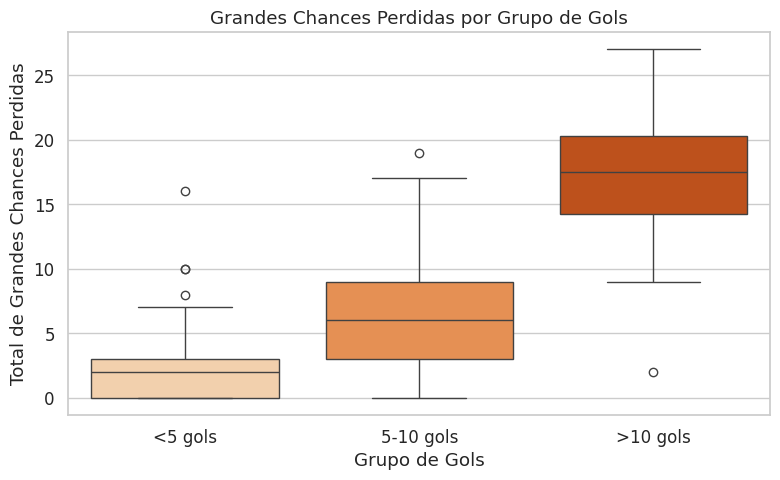

In [33]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Goals Group', y='Big Chances Missed', palette='Oranges', order=group_order)
plt.title('Grandes Chances Perdidas por Grupo de Gols')
plt.xlabel('Grupo de Gols')
plt.ylabel('Total de Grandes Chances Perdidas')
plt.tight_layout()
plt.show()

O gráfico mostra que quanto maior o número de gols marcados, maior também a quantidade de grandes chances desperdiçadas. Jogadores com mais de 10 gols apresentam as maiores medianas e uma dispersão bem ampla, o que indica que estão constantemente envolvidos em jogadas perigosas, mesmo que desperdicem bastante. Já os jogadores com menos de 5 gols têm baixa participação nesse tipo de lance. Isso reforça a ideia de que estar presente nas oportunidades é mais relevante do que aproveitá-las com perfeição.

In [34]:
player = df[(df['Goals'] > 10) & (df['Big Chances Missed'] < 5)]
print(f"Jogador: {player.iloc[0]['Player Name']}\nGols: {player.iloc[0]['Goals']}")

Jogador: Matheus Cunha
Gols: 15


O mais interessante deste gráfico é que, além de evidenciar *outliers* que potencialmente devem ser evitados, como é o caso de jogadores que desperdiçam muitas chances e marcam poucos gols, foi descoberto um caso de um jogador que possui poquíssimas chances desperdiçadas em comparação com o todo e apesar disso marcou um número relativamente alto de gols, este jogador é o brasileiro Matheus Cunha, que marcou 15 gols na temporada. Este perfil de jogador pode gerar interesse em muitos clubes no mundo do futebol.

/tmp/ipython-input-35-1495335203.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Goals Group', y='Offsides', palette='Purples', order=group_order)


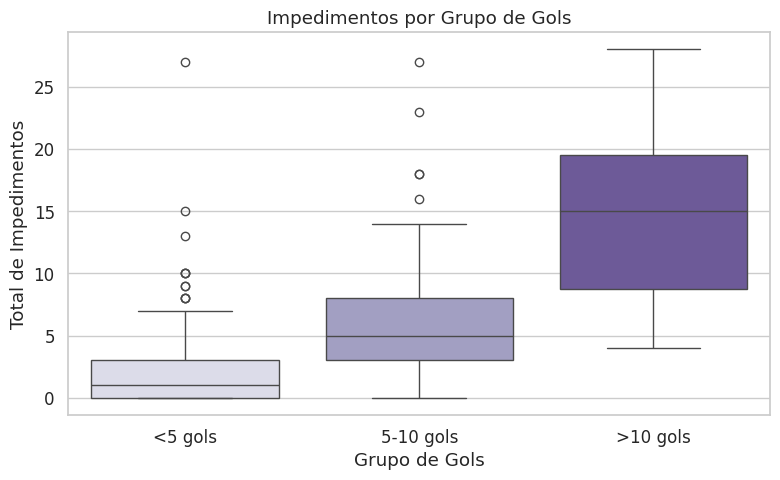

In [35]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Goals Group', y='Offsides', palette='Purples', order=group_order)
plt.title('Impedimentos por Grupo de Gols')
plt.xlabel('Grupo de Gols')
plt.ylabel('Total de Impedimentos')
plt.tight_layout()
plt.show()

O gráfico mostra que jogadores com mais de 10 gols acumulam, em média, mais impedimentos do que os demais grupos, o que faz sentido considerando que costumam jogar mais próximos do gol adversário. No entanto, é importante observar a grande variabilidade desse grupo, além da presença de muitos outliers nos grupos com menos gols, o que indica que nem sempre estar impedido com frequência está diretamente ligado à produtividade ofensiva. Ou seja, o número de impedimentos pode refletir um estilo de jogo mais agressivo, mas não é, isoladamente, um bom indicador de desempenho ofensivo.



/tmp/ipython-input-36-3332869480.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Goals Group', y='Dispossessed', palette='Reds', order=group_order)


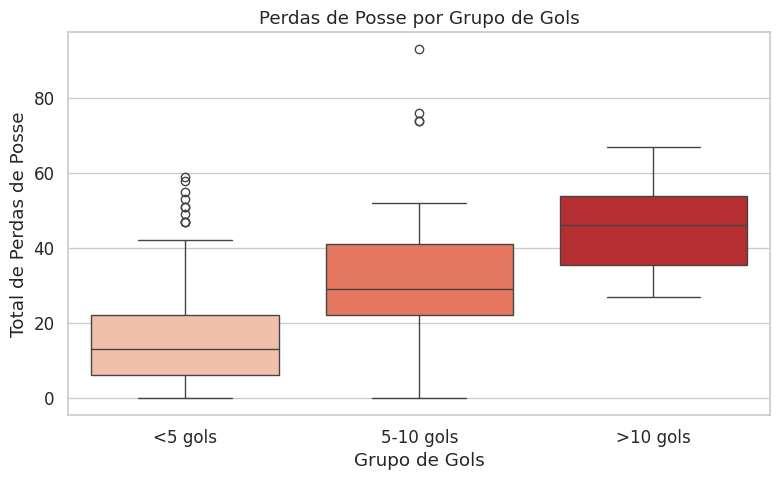

In [36]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Goals Group', y='Dispossessed', palette='Reds', order=group_order)
plt.title('Perdas de Posse por Grupo de Gols')
plt.xlabel('Grupo de Gols')
plt.ylabel('Total de Perdas de Posse')
plt.tight_layout()
plt.show()

O gráfico mostra que jogadores com mais gols tendem a perder mais a posse de bola, o que pode indicar uma atuação mais agressiva ou arriscada no ataque. O grupo com mais de 10 gols tem a mediana e os quartis mais altos, mas a diferença em relação ao grupo de 5–10 gols não é tão gritante, e os valores estão bem concentrados. Isso sugere que, apesar da tendência, a perda de posse não é um diferencial claro entre os grupos, ou seja, não é regra que o artilheiro perca mais a bola, mas sim uma característica comum em perfis mais participativos no terço final.

/tmp/ipython-input-37-2360258531.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Goals Group', y='Assists', palette='BuGn', order=group_order)


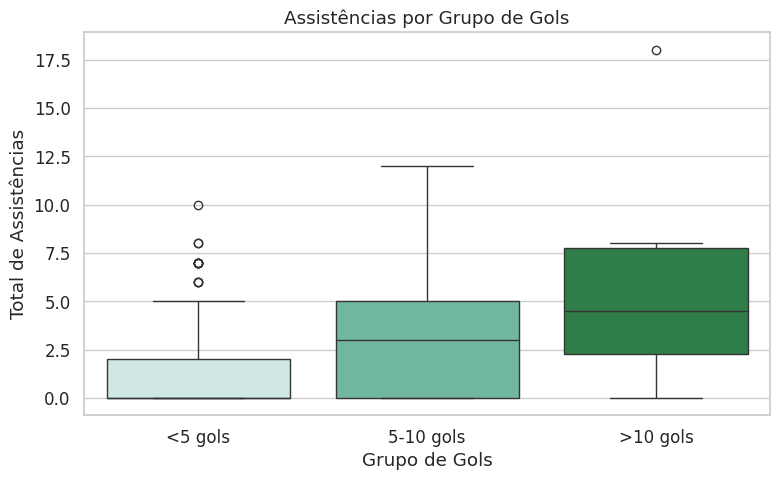

In [37]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Goals Group', y='Assists', palette='BuGn', order=group_order)
plt.title('Assistências por Grupo de Gols')
plt.xlabel('Grupo de Gols')
plt.ylabel('Total de Assistências')
plt.tight_layout()
plt.show()

O gráfico mostra que jogadores com mais gols também apresentam, em média, mais assistências, com destaque claro para o grupo acima de 10 gols, que tem mediana mais alta e menor concentração de valores baixos. Ainda que existam jogadores artilheiros com poucas ou nenhuma assistência, a distribuição sugere que há um número relevante de atletas que conseguem contribuir tanto finalizando quanto criando jogadas. Isso reforça que, embora a correlação entre gols e assistências não seja tão forte numericamente, o padrão visual aponta uma tendência real de participação ofensiva mais completa entre os goleadores.



In [38]:
player = df[(df['Goals'] > 10) & (df['Assists'] > 15)]
print(f"Jogador: {player.iloc[0]['Player Name']}\nGols: {player.iloc[0]['Goals']}")

Jogador: Mohamed Salah
Gols: 29


Assim como Matheus Cunha foi destacado como um *outlier* positivo na análise anterior, nesta análise de assistências deve-se chamar a atenção para o atleta Mohamed Salah, que além de ser o maior artilheiro da temporada, com 29 gols, também é o jogador com o maior número de assistências, sendo ele isoladamente o indivíduo que mais contribuiu na criação de gols em toda a temporada.

Esse perfil de jogador é invariavelmente o mais cobiçado entre os clubes e na maioria das vezes classificado como o melhor futebolista do ano.

<h3> Observação importante </h3>

É importante destacar que os grupos analisados estão desbalanceados, com a maioria dos jogadores marcando menos de 5 gols. Apenas 10 atletas ultrapassaram a marca de 10 gols na temporada. Isso limita a força estatística de algumas análises, principalmente nos boxplots segmentados por grupo. Ainda assim, os padrões observados fornecem pistas interessantes sobre o comportamento dos jogadores mais produtivos, e devem ser interpretados como tendências, não como regras absolutas.

## Pair Plot

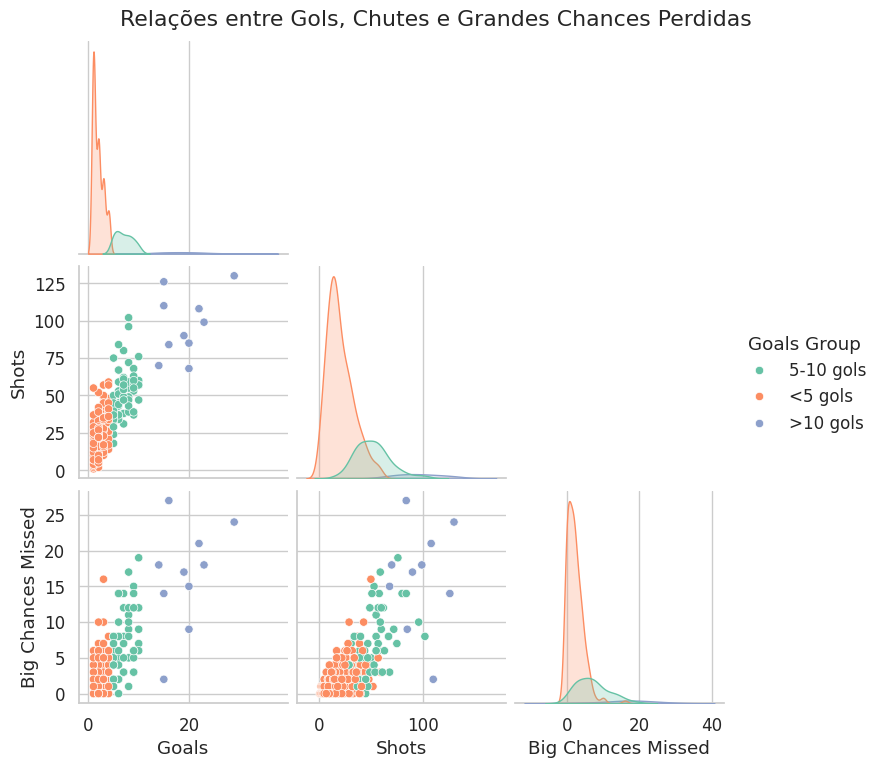

In [39]:
cols_plot = ['Goals', 'Shots', 'Big Chances Missed']

sns.pairplot(df[cols_plot + ['Goals Group']], hue='Goals Group', palette='Set2', corner=True)
plt.suptitle('Relações entre Gols, Chutes e Grandes Chances Perdidas', y=1.02)
plt.show()

O gráfico consolidado entre gols, chutes e grandes chances perdidas resume bem tudo o que foi observado até aqui. Há uma relação clara entre Shots e Goals, como já apontado, mas o gráfico reforça visualmente que jogadores com mais gols também são os que mais finalizam e, naturalmente, os que mais desperdiçam chances claras.

A correlação entre Shots e Big Chances Missed aparece forte, o que reforça a ideia de que o volume ofensivo traz tanto gols quanto desperdícios. O grupo de jogadores com mais de 10 gols, com exceção de alguns *outliers*, se destaca nitidamente no canto superior direito das combinações, formando um cluster visual claro e isolado dos demais. Já os atletas com menos de 5 gols se concentram em regiões mais baixas em todas as variáveis, o que confirma a limitação ofensiva desse grupo.

## Swarm plot

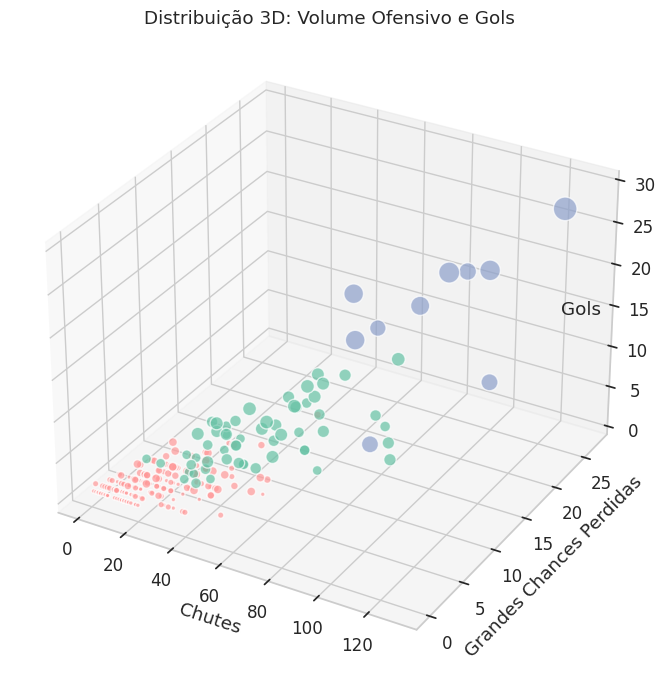

In [40]:
colors = {
    '<5 gols': '#FF9999',
    '5-10 gols': '#66C2A5',
    '>10 gols': '#8DA0CB'
}

df['Color'] = df['Goals Group'].map(colors)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df['Shots'],
    df['Big Chances Missed'],
    df['Goals'],
    c=df['Color'],
    s=df['Goals'] * 10,
    alpha=0.7,
    edgecolors='w'
)

ax.set_xlabel('Chutes')
ax.set_ylabel('Grandes Chances Perdidas')
ax.set_zlabel('Gols', labelpad=-35)
ax.set_title('Distribuição 3D: Volume Ofensivo e Gols')

plt.tight_layout()
plt.show()

O gráfico 3D confirma a correlação já observada entre chutes, grandes chances perdidas e gols. Jogadores com mais gols apresentam, em geral, maior volume de finalizações e participações ofensivas, enquanto os com menos gols se concentram em níveis mais baixos dessas variáveis.


## Radar plot

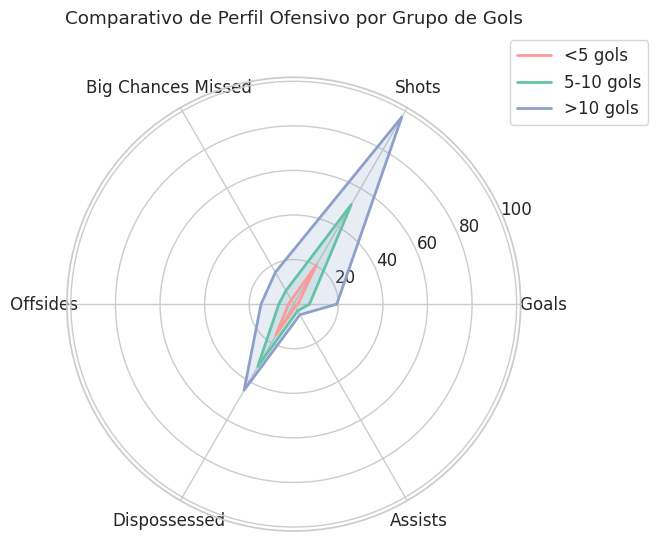

In [41]:
radar_features = ['Goals', 'Shots', 'Big Chances Missed', 'Offsides', 'Dispossessed', 'Assists']

group_means = (
    df.groupby('Goals Group')[radar_features]
    .mean()
    .reindex(group_order)
)

labels = radar_features
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

group_colors = {
    '<5 gols': '#FF9999',
    '5-10 gols': '#66C2A5',
    '>10 gols': '#8DA0CB'
}

for group in group_means.index:
    values = group_means.loc[group].tolist()
    values += values[:1]
    ax.plot(angles, values, label=group, color=group_colors[group], linewidth=2)
    ax.fill(angles, values, color=group_colors[group], alpha=0.2)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title('Comparativo de Perfil Ofensivo por Grupo de Gols', y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

O gráfico mostra que os jogadores com mais de 10 gols se destacam em todas as variáveis ofensivas analisadas, especialmente em número de chutes, gols e grandes chances perdidas. A diferença entre os grupos é clara, com um crescimento consistente dos valores conforme aumenta o número de gols. Os jogadores com menos de 5 gols apresentam um perfil mais discreto em todos os aspectos ofensivos, enquanto o grupo intermediário (5–10 gols) mantém valores médios entre os dois extremos. A visualização reforça a relação entre volume ofensivo e produtividade, com os artilheiros acumulando maior participação nas ações de ataque.











# Pré-processamento dos Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

O objetivo desta etapa é preparar o conjunto de dados para análises quantitativas mais formais. As seguintes operações foram aplicadas:

- **Seleção de variáveis numéricas:** foram mantidas apenas as colunas com dados numéricos, por serem compatíveis com as análises a seguir.
- **Tratamento de valores ausentes:** verificou-se que não há valores nulos no subconjunto de variáveis escolhidas.
- **Padronização dos dados:** os valores foram padronizados utilizando `StandardScaler`, de forma a colocar todas as variáveis em uma escala comum, sem alterar sua distribuição.
- **Separação entre variáveis independentes (X) e variável alvo (y):** a coluna `Goals Group` foi discretizada e definida como variável alvo.
- **Seleção de características**: é uma etapa crucial para o objetivo deste trabalho, em que será definido de fato quais características melhor descrevem um grupo de artilheiros.

As transformações permitem aplicar técnicas de seleção de atributos e preparar os dados para possíveis modelos futuros.

No caso deste trabalho, não faz sentido separar os dados em conjunto de treino e teste pois o objetivo não é montar um modelo de classificação ou regressão, mas sim indicar **quais características de um grupo comum de jogadores fazem com que estes tenham maior tendência a marcar gols.**


In [42]:
# Seleção de colunas numéricas
df_model = df.select_dtypes(include='number').copy()

In [43]:
# Verifica valores ausentes
print("Valores ausentes por coluna:")
print(df_model.isnull().sum())

Valores ausentes por coluna:
Appearances                  0
Minutes                      0
Goals                        0
Assists                      0
Shots                        0
Big Chances Missed           0
Hit Woodwork                 0
Offsides                     0
Touches                      0
Passes%                      0
Crosses %                    0
fThird Passes %              0
Through Balls                0
Carries                      0
Progressive Carries          0
Carries Ended with Assist    0
Carries Ended with Shot      0
Carries Ended with Chance    0
Possession Won               0
Dispossessed                 0
dtype: int64


In [44]:
# Padronização
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_model), columns=df_model.columns)

In [45]:
# Discretização da variável alvo
encoder = LabelEncoder()
y_group = encoder.fit_transform(df['Goals Group'])

In [46]:
# Seleção de características
X = df_scaled.drop(columns=['Goals'], axis=1)

y = y_group

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': selector.scores_,
    'p-Value': selector.pvalues_
}).sort_values(by='F-Score', ascending=False)

feature_scores

,Feature,F-Score,p-Value
3,Shots,228.756920,8.630548e-58
4,Big Chances Missed,137.312278,2.729980e-41
6,Offsides,64.232596,2.384033e-23
18,Dispossessed,42.878267,8.525864e-17
5,Hit Woodwork,28.792589,5.212433e-12
2,Assists,26.819292,2.639901e-11
0,Appearances,20.204807,7.084163e-09
1,Minutes,18.806645,2.384963e-08
11,Through Balls,13.038265,4.043524e-06
17,Possession Won,12.890735,4.623378e-06


/tmp/ipython-input-47-3016286072.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_scores, x='F-Score', y='Feature', palette='viridis')


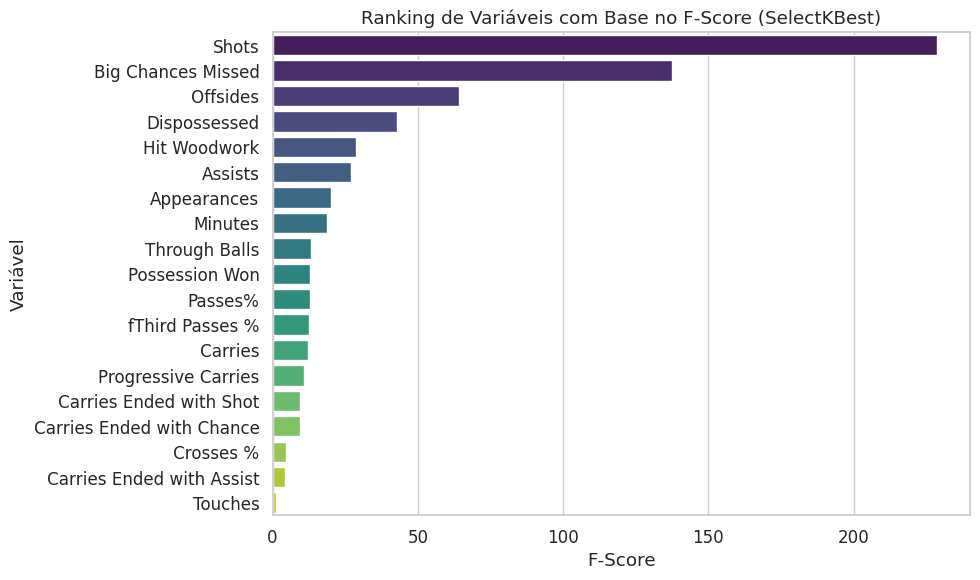

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_scores, x='F-Score', y='Feature', palette='viridis')
plt.title('Ranking de Variáveis com Base no F-Score (SelectKBest)')
plt.xlabel('F-Score')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

A seleção de atributos com base no teste F-score indicou que as variáveis mais relevantes para distinguir os grupos de jogadores, segundo a quantidade de gols marcados, são:

1.   Número de chutes
2.   Grandes chances perdidas
3.   Impedimentos
4.   Perdas de posse
5.   Assistências

**Obs.:** bola na trave também é uma característica relevante, no entanto, por se tratar de um evento não ordinário, foi decidido descartá-la da lista e considerar que o número de chutes já inclui possíveis bolas na trave.

Outras variáveis, como aparições e minutos em campo, apresentam influência menor.

Variáveis como toques na bola e cruzamentos não se mostraram eficazes para diferenciar os grupos de desempenho ofensivo.



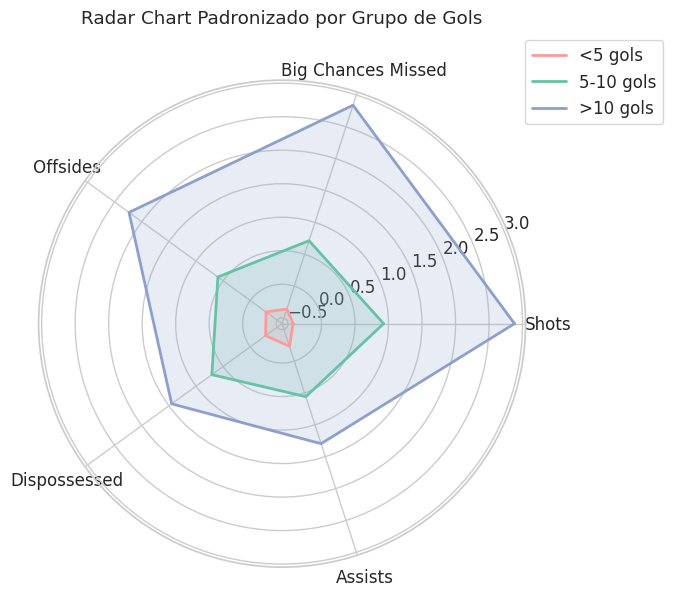

In [48]:
radar_vars = ['Shots', 'Big Chances Missed', 'Offsides', 'Dispossessed', 'Assists']

df_scaled['Goals Group'] = df['Goals Group'].values
group_means_std = df_scaled.groupby('Goals Group')[radar_vars].mean().reindex(group_order)

num_vars = len(radar_vars)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
group_colors = {'<5 gols': '#FF9999', '5-10 gols': '#66C2A5', '>10 gols': '#8DA0CB'}

for group in group_means_std.index:
    values = group_means_std.loc[group].tolist()
    values += values[:1]
    ax.plot(angles, values, label=group, color=group_colors[group], linewidth=2)
    ax.fill(angles, values, color=group_colors[group], alpha=0.2)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(radar_vars)
ax.set_title('Radar Chart Padronizado por Grupo de Gols', y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

Acima ilustrado o radar chart final, agora com as variáveis padronizadas, evidencia com clareza os padrões já observados ao longo da análise. Os jogadores com mais de 10 gols mantêm um perfil ofensivo consistentemente mais elevado em todas as métricas analisadas, destacando-se em volume de finalizações, presença em grandes chances e participação nas jogadas de ataque.

A visualização oferece uma leitura mais equilibrada entre as variáveis, eliminando distorções causadas por escalas distintas, e sintetiza de forma clara os contrastes entre os perfis dos grupos de jogadores.

Este gráfico encerra o trabalho conectando todas as etapas exploradas, do levantamento estatístico às comparações visuais entre o desempenho ofensivo dos atletas.


# Conclusão

Neste trabalho, exploramos dados da temporada 2024/2025 da Premier League com o objetivo de entender melhor o que diferencia os jogadores que mais marcam gols dos demais atletas da competição. A partir das hipóteses levantadas no início:

1. Existe um conjunto de características comuns aos artilheiros?
2. É possível agrupar esses jogadores com base nesses padrões?

Foi realizada uma análise exploratória detalhada e cuidadosamente documentada, com foco na interpretação e visualização dos dados.

Para organizar a análise, os jogadores foram divididos em três grupos de acordo com o número de gols marcados: menos de 5, entre 5 e 10, e mais de 10 gols. Essa segmentação, embora simples, se mostrou eficaz na comparação dos diferentes perfis ofensivos. Mesmo com o evidente desbalanceamento entre as classes, com a maioria dos atletas concentrada no grupo com menos de 5 gols, a análise não foi prejudicada. Pelo contrário: essa diferença de escala permitiu visualizar com mais clareza o quanto os artilheiros realmente se destacam em várias métricas ofensivas.

Essa abordagem também possibilitou a identificação de outliers de interesse, como o brasileiro Matheus Cunha, que marcou 15 gols com pouquíssimas chances desperdiçadas, e Mohamed Salah, que além de artilheiro também lidera em assistências. Casos como esses mostram que buscar entender o perfil dos jogadores mais produtivos não é sobre definir uma regra universal, mas sim sobre encontrar padrões comuns dentro de um grupo excepcional. São essas similaridades que, quando compreendidas, ajudam a guiar decisões práticas e estratégicas.

Na prática, uma análise como essa pode ser aplicada em contextos reais de clubes de futebol, auxiliando desde a captação de talentos nas categorias de base até a tomada de decisão sobre contratações. Entender quais características estão mais presentes nos jogadores que costumam se destacar ofensivamente permite montar elencos mais alinhados com o modelo de jogo e com os objetivos do clube no mercado.

Como trabalho futuro, sugere-se a aplicação de algoritmos de aprendizado não supervisionado, como técnicas de clusterização, para identificar agrupamentos naturais entre os jogadores com base em múltiplas variáveis ofensivas. Essa abordagem permitiria descobrir perfis ocultos dentro do dataset, sem depender da segmentação manual por número de gols, e potencialmente revelar novos grupos de jogadores com alto potencial ofensivo.

Dessa forma, o trabalho cumpre o que se propôs: investigar, comparar e traduzir os dados em insights práticos sobre o desempenho ofensivo dos jogadores, utilizando técnicas de análise exploratória, seleção de atributos e visualização. Tudo isso mantendo uma linha lógica, objetiva e conectada com a realidade do futebol profissional.